In [1]:
# Khai báo các thư viện cần thiết
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Bỏ qua warning
warnings.filterwarnings('ignore')

# Pandas tùy chỉnh
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting tùy chỉnh
%matplotlib inline
mpl.style.use('ggplot')

# Đọc dữ liệu từ file csv
transactions = pd.read_csv('C:/Users/green/Downloads/DemoDA3/creditcard.csv')

<Figure size 432x288 with 0 Axes>

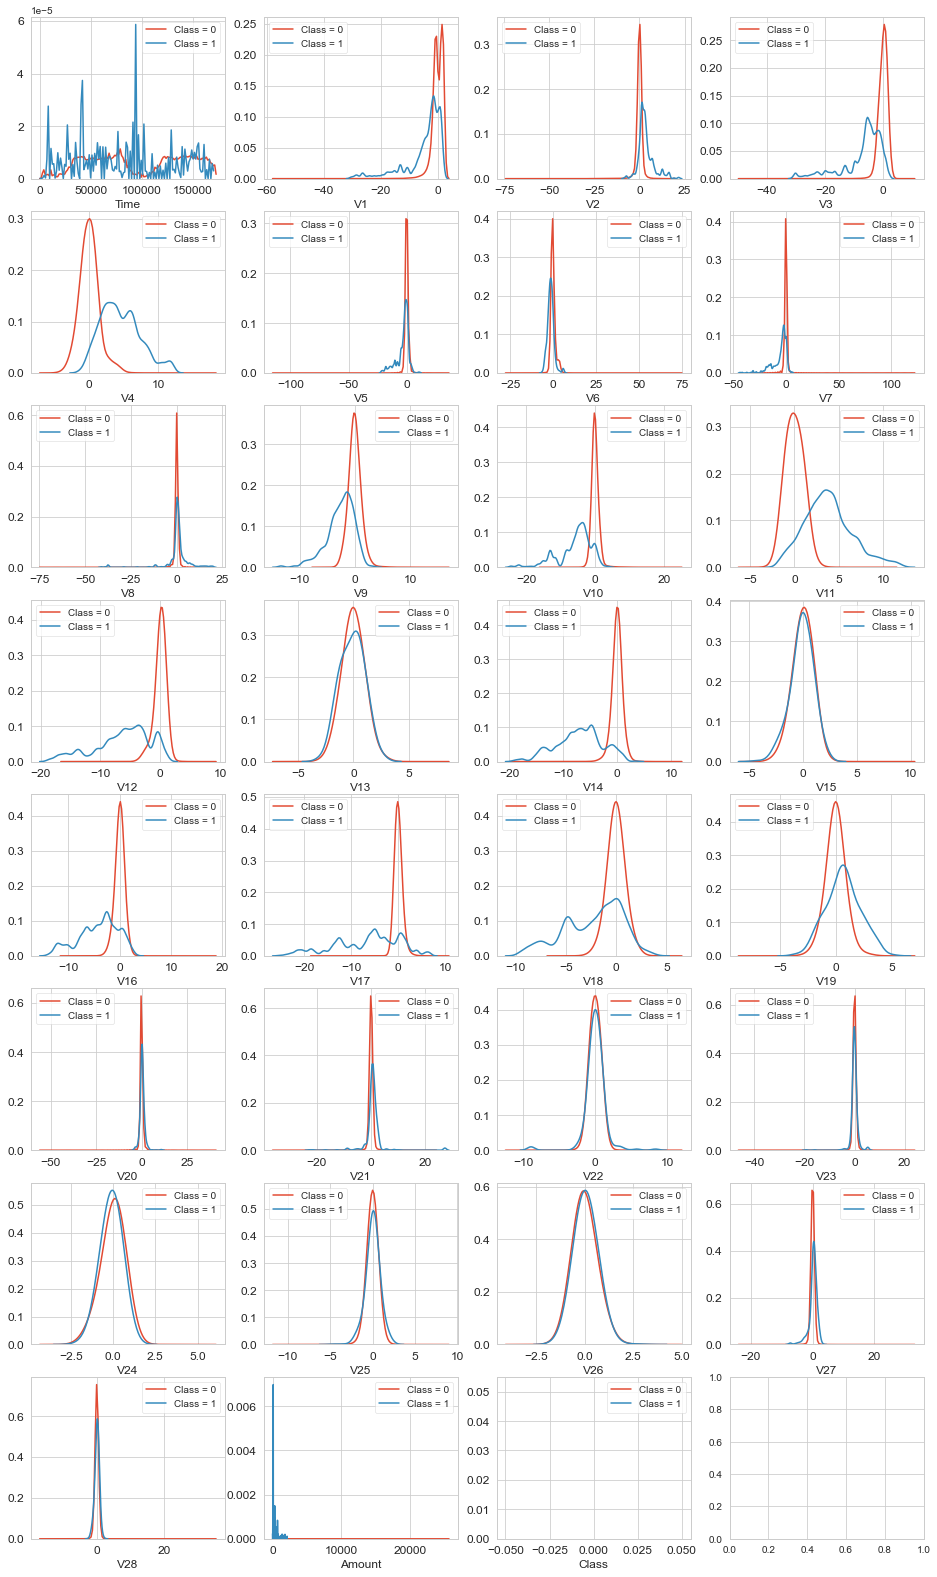

In [2]:
# Biểu đồ mật độ của các thuộc tính dựa trên thuộc tính Class
var = transactions.columns.values

i = 0
t0 = transactions.loc[transactions['Class'] == 0]
t1 = transactions.loc[transactions['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [3]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']               # Response
del transactions                              # Xóa dữ liệu lúc đầu

# Tách dataset thành 80% cho training và 20% cho test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [4]:
from sklearn.feature_selection import mutual_info_classif

# Tính toán sự ảnh hưởng của các thuộc tính đến kết quả dự đoán 
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

In [5]:
# Kết quả của tương quan của mỗi thuộc tính với thuộc tính Class
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001388
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64